In [1]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped, TransformerModelLoopedLastNTokens
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [2]:
model_loop_b5 = TransformerModelLoopedLastNTokens(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    n=None
).cuda()

cirriculum_b5  = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [5000, 5, 0])
## Fixed seed
metrics_l1_b5  = train_without_config(
    model_loop_b5, cirriculum_b5,
    model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  y = torch.nn.functional.scaled_dot_product_attention(


0


loss 3.7078871726989746: 100%|██████████| 15000/15000 [13:53<00:00, 18.00it/s]


In [3]:
model_loop_b10 = TransformerModelLoopedLastNTokens(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    n=None
).cuda()

cirriculum_b10  = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

## Fixed seed
metrics_l1_b10  = train_without_config(
    model_loop_b10, cirriculum_b10,
    model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


loss 10.170994758605957:   0%|          | 1/15000 [00:00<31:58,  7.82it/s]

0


loss 2.7635741233825684: 100%|██████████| 15000/15000 [28:01<00:00,  8.92it/s]


In [5]:
def calculate_by_n_points(model, max_n_points, n_loops=5):
    vals = []
    loop_steps = []
    model.eval()
    for i in range(1, max_n_points):
        model.n = i
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=n_loops, model_n_dims=10, n_points=31, family="gpt2_loop")
        vals.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, vals
steps_points_b5, values_points_b5 = calculate_by_n_points(model_loop_b5, max_n_points=31, n_loops=5)
steps_points_b10, values_points_b10 = calculate_by_n_points(model_loop_b10, max_n_points=31, n_loop=10)

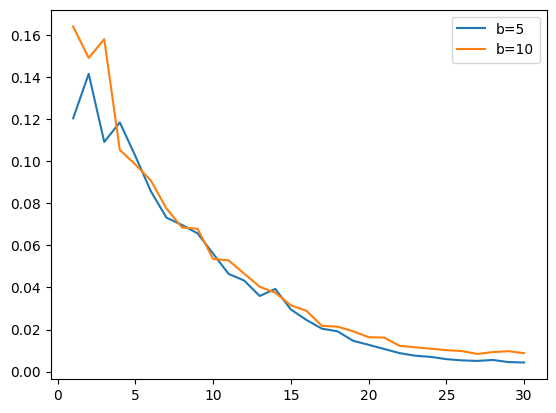

In [10]:
plt.plot(steps_points_b5, values_points_b5)
plt.plot(steps_points_b10, values_points_b10 )
plt.legend(["b=5", "b=10"])
plt.savefig('../images/check_last_n_tokens_quality.png')

In [12]:
import torch
## Random seed, trained not locally
model_b5 = TransformerModelLoopedLastNTokens(n_dims=10,
                                             n_positions=101,
                                             n_embd=256,
                                             n_layer=1,
                                             n_head=4,
                                             pred_type="regression",
                                             n=None).cuda()

model_b5.load_state_dict(
    torch.load("../scripts/scripts/models/noisy_linear_regression/model_b5.pt")["model_state_dict"])

model_b10 = TransformerModelLoopedLastNTokens(n_dims=10,
                                              n_positions=101,
                                              n_embd=256,
                                              n_layer=1,
                                              n_head=4,
                                              pred_type="regression",
                                              n=None).cuda()

model_b10.load_state_dict(
    torch.load("../scripts/scripts/models/noisy_linear_regression/model_b10.pt")["model_state_dict"])

model_b20 = TransformerModelLoopedLastNTokens(n_dims=10,
                                              n_positions=101,
                                              n_embd=256,
                                              n_layer=1,
                                              n_head=4,
                                              pred_type="regression",
                                              n=None).cuda()

model_b20.load_state_dict(
    torch.load("../scripts/scripts/models/noisy_linear_regression/model_b10.pt")["model_state_dict"])

number of parameters: 0.79M
number of parameters: 0.79M
number of parameters: 0.79M


C:\Users\Vadim_K\AppData\Local\Temp\ipykernel_10708\2660835140.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("../scripts/scripts/models/noisy_linear_regres

<All keys matched successfully>

In [45]:
def calculate_by_n_points(model, max_n_points, n_loops=5):
    vals = []
    loop_steps = []
    model.eval()
    for i in range(1, max_n_points+1):
        model.n = i
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=n_loops, model_n_dims=10, family="gpt2_loop", n_points=max_n_points)
        vals.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, vals

In [46]:
steps_points_b5_, values_points_b5_ = calculate_by_n_points(model_b5, max_n_points=31, n_loops=5)
steps_points_b10_, values_points_b10_ = calculate_by_n_points(model_b10, max_n_points=31, n_loops=10)
steps_points_b20_, values_points_b20_ = calculate_by_n_points(model_b20, max_n_points=31, n_loops=20)

In [ ]:
steps_points_b5_x2, values_points_b5_x2 = calculate_by_n_points(model_b5, max_n_points=31, n_loops=5 * 2)
steps_points_b10_x2, values_points_b10_x2 = calculate_by_n_points(model_b10, max_n_points=31, n_loops=10 * 2)
steps_points_b20_x2, values_points_b20_x2 = calculate_by_n_points(model_b20, max_n_points=31, n_loops=20 * 2)

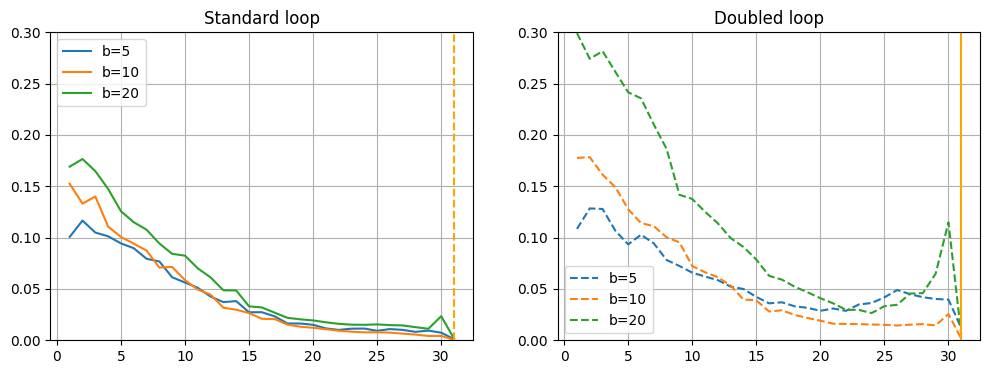

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].set_title("Standard loop")
axs[0].plot(steps_points_b5_, values_points_b5_ )
axs[0].plot(steps_points_b10_, values_points_b10_)
axs[0].plot(steps_points_b20_, values_points_b20_)
axs[0].set_ylim([0, 0.3])
axs[0].grid()
axs[0].axvline(x = 31, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[0].legend(["b=5", "b=10", "b=20"])

axs[1].set_title("Doubled loop")
axs[1].plot(steps_points_b5_x2, values_points_b5_x2 , linestyle='dashed')
axs[1].plot(steps_points_b10_x2, values_points_b10_x2, linestyle='dashed')
axs[1].plot(steps_points_b20_x2, values_points_b20_x2, linestyle='dashed')
axs[1].set_ylim([0, 0.3])
axs[1].grid()
axs[1].axvline(x = 31, color = 'orange', label = 'axvline - full height')
axs[1].legend(["b=5", "b=10", "b=20"])

fig.savefig('../images/check_last_n_tokens_quality.png')